# Data Exploration with FRED

This notebook demonstrates various techniques for exploring FRED economic data, including:
- Working with multiple series
- Data transformation and analysis
- Advanced visualization techniques

In [3]:
import sys
sys.path.append('../..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.api.fred_client import FREDClient
from src.models.economic_data import Series
from src.utils.helpers import series_to_dataframe

%matplotlib inline
plt.style.use('classic')

## Initialize Client and Fetch Multiple Series

Let's fetch multiple economic indicators to analyze relationships between them.

In [4]:
client = FREDClient()

# Fetch multiple economic indicators
series_ids = {
    'GDP': 'Gross Domestic Product',
    'UNRATE': 'Unemployment Rate',
    'CPIAUCSL': 'Consumer Price Index',
    'FEDFUNDS': 'Federal Funds Rate'
}

# Create a dictionary to store our dataframes
dfs = {}

for series_id, name in series_ids.items():
    data = client.get_series(series_id)
    series = Series.from_api_response(data)
    dfs[series_id] = series_to_dataframe(series)

## Data Analysis

Let's analyze the relationships between these economic indicators.

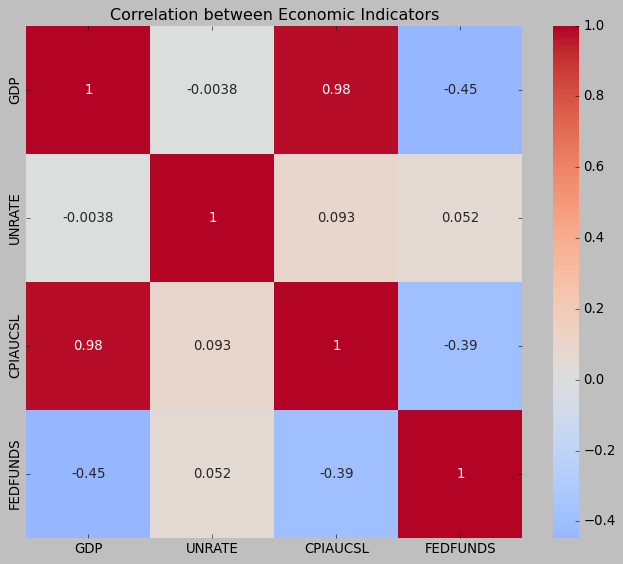

In [5]:
# Combine all series into one DataFrame
combined_df = pd.DataFrame()

for series_id, df in dfs.items():
    combined_df[series_id] = df['value']

# Calculate correlation matrix
correlation_matrix = combined_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Economic Indicators')
plt.show()

## Time Series Visualization

Create a multi-line plot showing trends in different economic indicators.

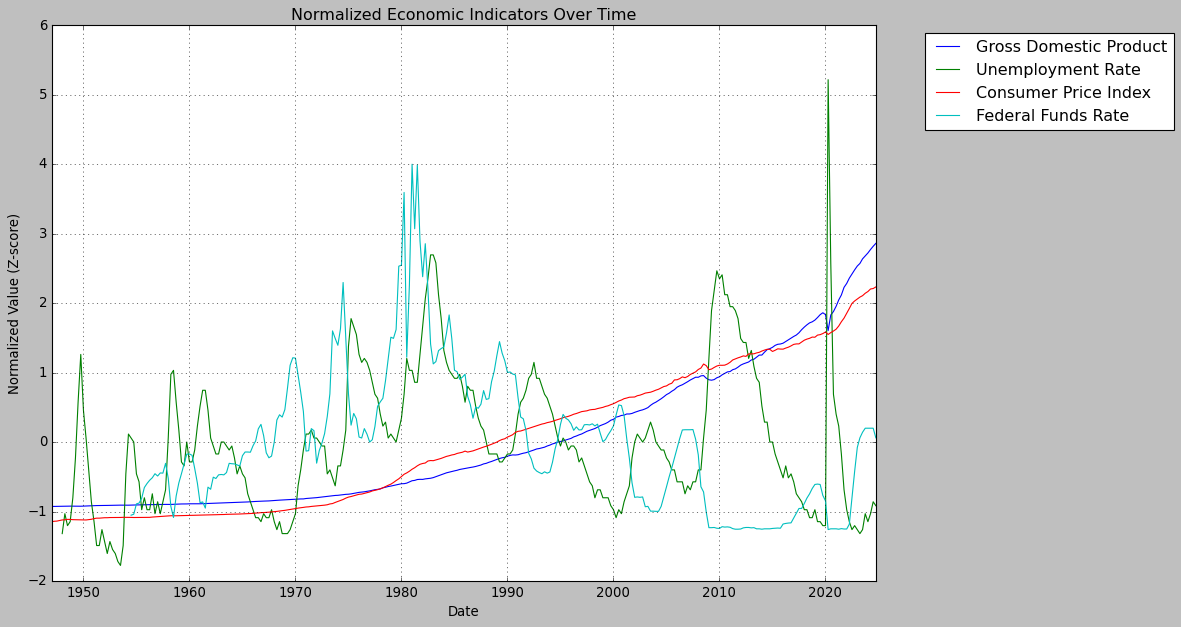

In [6]:
# Normalize the data for comparison
normalized_df = (combined_df - combined_df.mean()) / combined_df.std()

# Create multi-line plot
plt.figure(figsize=(15, 8))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], label=series_ids[column])

plt.title('Normalized Economic Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Value (Z-score)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()